In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

In [2]:
rating_df=pd.read_csv('dataset/ratings.csv')
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
rating_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [4]:
movies_df=pd.read_csv('dataset/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies_df.shape

(9742, 3)

In [6]:
movies_df['count_votes']=rating_df.groupby('movieId')['movieId'].transform('count')
movies_df['average_votes']=rating_df.groupby('movieId')['rating'].transform('mean')
movies_df.head()

,movieId,title,genres,count_votes,average_votes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,52,3.259615
2,3,Grumpier Old Men (1995),Comedy|Romance,102,3.946078
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,203,3.975369
4,5,Father of the Bride Part II (1995),Comedy,204,4.237745


## 10 filmova koji su dobili najveci broj ocjena

In [7]:
movies_df.sort_values(by='count_votes', ascending=False).head(10)

,movieId,title,genres,count_votes,average_votes
2339,3097,"Shop Around the Corner, The (1940)",Comedy|Drama|Romance,329,4.164134
6518,53972,Live Free or Die Hard (2007),Action|Adventure|Crime|Thriller,329,4.164134
9175,149011,He Never Died (2015),Comedy|Drama|Horror,329,4.164134
7118,71033,"Secret in Their Eyes, The (El secreto de sus o...",Crime|Drama|Mystery|Romance|Thriller,329,4.164134
1801,2401,Pale Rider (1985),Western,329,4.164134
1678,2259,Blame It on Rio (1984),Comedy|Romance,329,4.164134
7093,70305,Race to Witch Mountain (2009),Adventure|Children|Fantasy|Sci-Fi|Thriller,329,4.164134
1578,2117,1984 (Nineteen Eighty-Four) (1984),Drama|Sci-Fi,329,4.164134
1445,1968,"Breakfast Club, The (1985)",Comedy|Drama,329,4.164134
1409,1929,Grand Hotel (1932),Drama|Romance,329,4.164134


Najjednostavniji sistemi za preporucivanje filmova zasnovani su na ideji da najpopularniji filmovi (koji su ocjenjeni najvisom ocjenom ili koji su dobili najveci broj ocjena) imaju vecu vjerovatnocu da se dopadnu prosjecnoj publici. Oni razlicitim korisnicima nude oupstenu preporuku, bez obzira na ocjene koje je svaki korisnik dao u proslosti.


## 10 filmova sa najvisom prosjecnom ocjenom

In [8]:
movies_df.sort_values(by='average_votes', ascending=False).head(10)

,movieId,title,genres,count_votes,average_votes
8658,120919,Man on High Heels (2014),Action|Comedy,2,5.0
9414,165529,Flowers for Algernon (2000),Drama,1,5.0
294,336,"Walking Dead, The (1995)",Drama|War,1,5.0
8686,122892,Avengers: Age of Ultron (2015),Action|Adventure|Sci-Fi,1,5.0
9407,165101,Inferno (2016),Mystery|Thriller,1,5.0
8698,122924,X-Men: Apocalypse (2016),Action|Adventure|Fantasy|Sci-Fi,1,5.0
290,332,Village of the Damned (1995),Horror|Sci-Fi,1,5.0
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical,1,5.0
260,300,Quiz Show (1994),Drama,1,5.0
9147,147376,Doctor Who: A Christmas Carol (2010),Sci-Fi,1,5.0


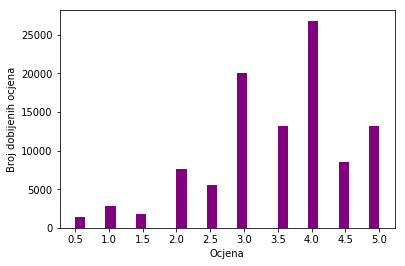

In [15]:
plt.hist(rating_df['rating'], bins=30, color='purple')
plt.xticks(np.arange(0.5,5.1,0.5))
plt.xlabel('Ocjena')
plt.ylabel('Broj dobijenih ocjena')
plt.show()

Text(0, 0.5, 'Broj dobijenih ocjena')

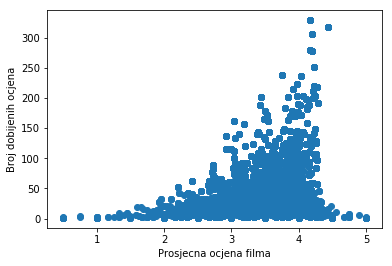

In [12]:
plt.scatter(np.array(movies_df['average_votes']), np.array(movies_df['count_votes']))
plt.xlabel('Prosjecna ocjena filma')
plt.ylabel('Broj dobijenih ocjena')